# Pyber Challenge

### Loading and Reading CSV files

In [117]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [118]:
# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [119]:
city_data_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [120]:
ride_data_df

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277


### Merge the DataFrames

In [121]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Challenge part 1. Get a Summary DataFrame 

In [122]:
# 1. Get the total rides for each city type
total_rides_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [123]:
# 2. Get the total drivers for each city type
total_drivers_by_type = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_by_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [124]:
# 3. Get the total amount of fares for each city type
total_fare_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fare_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [125]:
#  4. Get the average fare per ride for each city type. 
avg_fare_per_ride = total_fare_by_type / total_rides_by_type
avg_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [126]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver = total_fare_by_type / total_drivers_by_type 
avg_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [127]:
# 6. Create a PyBer summary DataFrame. 
pyber_ride_summary_df = pd.DataFrame({
    "Total Rides": total_rides_by_type,
    "Total Drivers": total_drivers_by_type,
    "Total Fares": total_fare_by_type,
    "Average Fare per Ride": avg_fare_per_ride,
    "Average Fare per Driver": avg_fare_per_driver})

pyber_ride_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [128]:
# 7. Delete the index name
# del pyber_ride_summary_df.index.name
pyber_ride_summary_df.index.name = ""
pyber_ride_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [129]:
# 8. Format the columns.
pyber_ride_summary_df["Total Rides"] = pyber_ride_summary_df["Total Rides"].map("{:,}".format)
pyber_ride_summary_df["Total Drivers"] = pyber_ride_summary_df["Total Drivers"].map("{:,}".format)
pyber_ride_summary_df["Total Fares"] = pyber_ride_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_ride_summary_df["Average Fare per Ride"] = pyber_ride_summary_df["Average Fare per Ride"].map("${:.2f}".format)
pyber_ride_summary_df["Average Fare per Driver"] = pyber_ride_summary_df["Average Fare per Driver"].map("${:.2f}".format)

# Display the data frame
pyber_ride_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
,,,,,
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Challenge part 2.  Create a line plot that shows the sum of the fares for each type of city.

In [130]:
# 1. Rename columns
# city	date	fare	ride_id	driver_count	type
pyber_data_df = pyber_data_df.rename(columns={
    "city": "City",
    "date": "Date",
    "fare": "Fare",
    "ride_id": "Ride id",
    "driver_count": "No. Drivers",
    "type": "City Type"
})
pyber_data_df

,City,Date,Fare,Ride id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [131]:
# 2. Set the index to the "Date" column.
pyber_data_df.set_index(pyber_data_df['Date'], inplace=True)

In [132]:
# 3. Make new df for fares and include only the 'Date', 'City Type', and'Fare' columns.
pyber_cities_fares = pyber_data_df[['Date','City Type' ,'Fare']].copy()

In [133]:
# 4. Drop the extra 'date' column. 
pyber_cities_fares.drop(['Date'], axis=1, inplace=True)

In [134]:
# 5. Set the index to datetime 
pyber_cities_fares.index = pd.to_datetime(pyber_data_df.index)

In [135]:
pyber_cities_fares.head(10)

,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58
2019-03-11 12:26:48,Urban,9.52
2019-02-27 11:17:56,Urban,43.25
2019-04-26 00:43:24,Urban,35.98
2019-01-08 03:28:48,Urban,35.09


In [136]:
# 6. Check the DataFrame with ".info()" for a Datetime datatype on the index.
pyber_cities_fares.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Type  2375 non-null   object 
 1   Fare       2375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [137]:
# 7a. Calculate the sum() of fares by the type of city and date using groupby() to create a Series. 
sum_fare_by_type = pyber_cities_fares.groupby(["City Type", "Date"]).sum()["Fare"]
sum_fare_by_type.head(10)

City Type  Date               
Rural      2019-01-01 09:45:36    43.69
           2019-01-02 11:18:32    52.12
           2019-01-03 19:51:01    19.90
           2019-01-04 03:31:26    24.88
           2019-01-06 07:38:40    47.33
           2019-01-08 06:19:45    19.39
           2019-01-09 15:30:35    31.84
           2019-01-11 04:39:27    16.42
           2019-01-14 07:09:17    18.05
           2019-01-14 15:58:48    54.10
Name: Fare, dtype: float64

In [138]:
# 7b. Alternatively, you can create the DataFrame in step #8 by using double brackets on the "Fare" column. 
sum_fare_by_type = pyber_cities_fares.groupby(["City Type", "Date"]).sum()[["Fare"]]
sum_fare_by_type.head(10)

Fare
City Type Date                      
Rural     2019-01-01 09:45:36  43.69
          2019-01-02 11:18:32  52.12
          2019-01-03 19:51:01  19.90
          2019-01-04 03:31:26  24.88
          2019-01-06 07:38:40  47.33
          2019-01-08 06:19:45  19.39
          2019-01-09 15:30:35  31.84
          2019-01-11 04:39:27  16.42
          2019-01-14 07:09:17  18.05
          2019-01-14 15:58:48  54.10

In [139]:
# 8. Convert the groupby Series into a DataFrame
sum_fare_by_type = pd.DataFrame(sum_fare_by_type)
sum_fare_by_type.head(10)

Fare
City Type Date                      
Rural     2019-01-01 09:45:36  43.69
          2019-01-02 11:18:32  52.12
          2019-01-03 19:51:01  19.90
          2019-01-04 03:31:26  24.88
          2019-01-06 07:38:40  47.33
          2019-01-08 06:19:45  19.39
          2019-01-09 15:30:35  31.84
          2019-01-11 04:39:27  16.42
          2019-01-14 07:09:17  18.05
          2019-01-14 15:58:48  54.10

In [140]:
# 9. Reset the index - this is needed to use the 'pivot()' function in pandas.
sum_fare_by_type = sum_fare_by_type.reset_index()
sum_fare_by_type.head(10)

,City Type,Date,Fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
5,Rural,2019-01-08 06:19:45,19.39
6,Rural,2019-01-09 15:30:35,31.84
7,Rural,2019-01-11 04:39:27,16.42
8,Rural,2019-01-14 07:09:17,18.05
9,Rural,2019-01-14 15:58:48,54.10


In [141]:
# 10. Create a pivot table with the "date" as the index and the columns = 'type' with the fare in each row.
sum_fare_by_type_pivot = sum_fare_by_type.pivot(index="Date", columns="City Type")["Fare"]
sum_fare_by_type_pivot.head(10)

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [142]:
# An additional check for the index as a 'datetime' datatype. 
sum_fare_by_type_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-01 00:08:16 to 2019-05-08 13:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  625 non-null    float64
 2   Urban     1625 non-null   float64
dtypes: float64(3)
memory usage: 74.2 KB


### Create a line chart that shows the fares from Jan 1, 2018 to April 29, 2018. 

In [143]:
# 11. Create a new DataFrame from the pivot table DataFrame on the given dates, '2018-01-01':'2018-04-29', using loc .
fares_Jan_April = sum_fare_by_type_pivot.loc['2019-01-01':'2019-04-28']
fares_Jan_April.head(20)

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [144]:
# 12. Create a new df and use "resample()"" by week 'W' and get the sum of the fares for each week. 
weekly_fares_df = fares_Jan_April.resample('W').sum()
weekly_fares_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


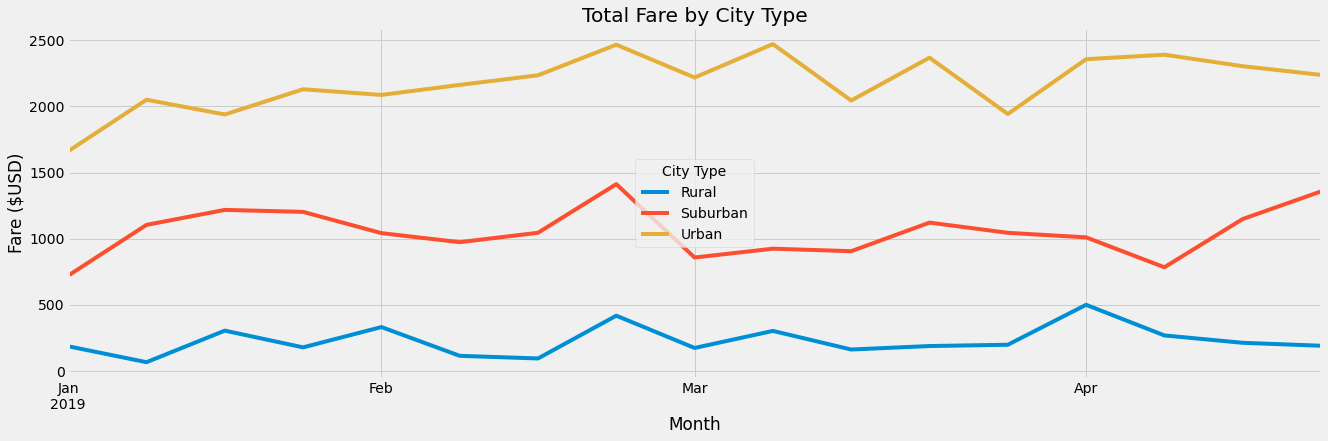

In [145]:
# 13. Use axes plotting to add labels and tile. 
from matplotlib import style
style.use('fivethirtyeight')
ax = weekly_fares_df.plot(figsize = (20,6))
# Add a title 
ax.set_title("Total Fare by City Type")
#  Add a x- and y-axis label.
ax.set_xlabel("Month")
ax.set_ylabel("Fare ($USD)")
plt.savefig("analysis/Challenge_fare_summary.png")
plt.show()